In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from header import numout2boolout

In [4]:
from header import X

In [5]:
from header import Xx

In [7]:
y=np.load("./processedData/y.npy")
Y=np.load("./processedData/Y.npy")

测试集比训练集更不均衡
改为nested pie

([<matplotlib.patches.Wedge at 0x7fb60aa26d60>,
 [Text(1.0999287410206067, 0.012520570147698473, '1'),
  Text(0.9128738180239822, 0.6137274577255916, '2'),
  Text(-1.079470104348197, 0.21152847046790915, '3'),
  Text(0.7866203819122286, -0.7689137628890901, '4')],
 [Text(0.5999611314657853, 0.006829401898744622, '0.4%'),
  Text(0.49793117346762655, 0.33476043148668627, '18.1%'),
  Text(-0.5888018750990164, 0.11537916570976861, '56.9%'),
  Text(0.42906566286121556, -0.41940750703041274, '24.6%')])

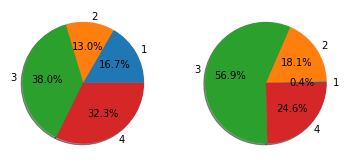

In [13]:
fig, axs = plt.subplots(1, 2)
axs[0].pie([sum(Y==i)/len(Y) for i in range(1,5)], labels=[i for i in range(1,5)], autopct='%1.1f%%', shadow=True)
axs[1].pie([sum(y==i)/len(y) for i in range(1,5)], labels=[i for i in range(1,5)], autopct='%1.1f%%', shadow=True)

In [26]:
raw=pd.read_csv("./data/train.csv")
rawX=raw.loc[:,"XXXinorg1":"purity"]

reactant combination 对反应的影响几乎是决定性的

In [ ]:
reactComb=np.load("./processedData/reactComb.npy",allow_pickle=True)

(array([8.79518072e-02, 1.46987952e-01, 6.14457831e-02, 4.45783133e-02,
        3.61445783e-02, 1.63855422e-02, 8.67469880e-03, 4.33734940e-03,
        1.92771084e-03, 3.61445783e-04, 4.81927711e-05]),
 array([  0,   2,   4,   6,   8,  10,  15,  20,  30,  50, 150, 200]),
 <BarContainer object of 11 artists>)

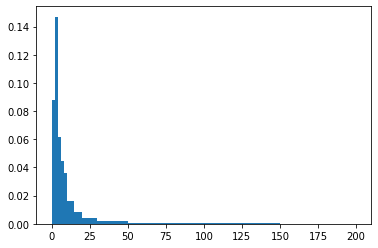

In [64]:
plt.hist([len(i) for i in reactantCombination],[0,2,4,6,8,10,15,20,30,50,150,200],density=True)

反应物类型推出为1的概率

In [56]:
rcOut=[sum([numout2boolout(Y[i]) for i in rc])/len(rc) for k in range(len(rc)) for rc in reactComb ]

(array([345.,  20.,  60., 120.,  55., 210.,  80., 120., 155., 910.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

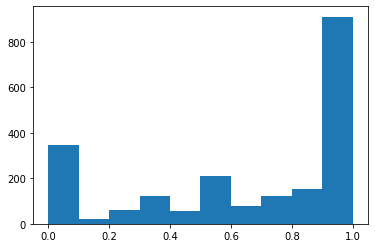

In [57]:
plt.hist(rcOut)

In [20]:
X_featureName=np.load("./processedData/X_featureName.npy")

SVC的参数选择：非常有趣的是使用0，1作为标签来拟合SVM后模型性能下降了

正则化强度C选择10左右比较合适

In [3]:
SVC_PUK=np.load("./processedData/SVC_PUK.npy")

In [4]:
serieLabel = [[], [], [], []]
for j, C in enumerate(np.logspace(-10, 10, num=20)):
        serieLabel[0] += ["PUK"]*6
        serieLabel[1] += ["numY"]*3+["boolY"]*3
        serieLabel[2] += [C]*6
        serieLabel[3] += ["rec", "prec", "acc"]*2

In [5]:
series = pd.Series(data=SVC_PUK, index=serieLabel)

In [13]:
series["PUK","numY",:,"rec"]

1.000000e-10    0.455571
1.128838e-09    0.546967
1.274275e-08    0.585008
1.438450e-07    0.420714
1.623777e-06    0.447350
1.832981e-05    0.577568
2.069138e-04    0.297051
2.335721e-03    0.440731
2.636651e-02    0.702036
2.976351e-01    0.726996
3.359818e+00    0.755687
3.792690e+01    0.748413
4.281332e+02    0.746997
4.832930e+03    0.734309
5.455595e+04    0.754035
6.158482e+05    0.751085
6.951928e+06    0.746376
7.847600e+07    0.756209
8.858668e+08    0.748194
1.000000e+10    0.745613
dtype: float64

Text(0.5, 0, 'lg C')

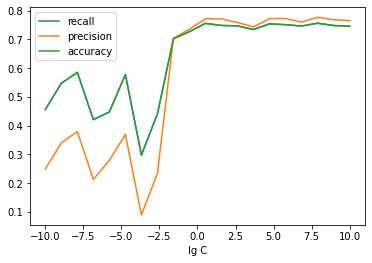

In [9]:
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"rec"],label="recall")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"prec"],label="precision")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","numY",:,"acc"],label="accuracy")
plt.legend()
plt.xlabel("lg C")

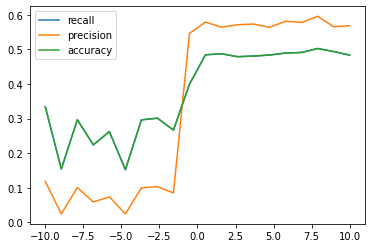

In [18]:
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"rec"],label="recall")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"prec"],label="precision")
plt.plot(np.log10(np.logspace(-10, 10, num=20)),series["PUK","boolY",:,"acc"],label="accuracy")
plt.legend()
plt.xlabel("lg C")

In [1]:
from header import SVC
# from header import reactantMusk

In [6]:
X_featureName=np.load("./processedData/X_featureName.npy")
rM=['XXXinorg1',"XXXinorg2","XXXinorg3","XXXorg1","XXXorg2"]
Musk=[i for i in range(len(X[0])) if X_featureName[i] not in rM]
Xx_musked=Xx[:,Musk]


In [7]:
np.save("./processedData/Xx_musked.npy",Xx_musked)

precision应当代替accuracy? 毕竟预测为1才会做代价昂贵的实验，因此要尽量保证1的正确性

In [40]:
from header import CV_author

(3955, 260)

In [59]:
from header import SVC
from header import PUK_kernel

{'kernel': 'rbf', 'class_weight': 'balanced', 'C': 1000}
recall=0.722
precision=0.727
accuracy=0.722
confusion matrix is
[[208 158]
 [180 669]]
recall=0.688
precision=0.724
accuracy=0.688
confusion matrix is
[[197 140]
 [257 677]]
recall=0.729
precision=0.761
accuracy=0.729
confusion matrix is
[[350 120]
 [278 721]]


In [50]:
from header import reactantCombination

In [24]:
CV_author(X_musked,Y,3,SVC,{"kernel":"rbf","class_weight":"balanced","C":10})

缺点，单个svm无法给出概率，而多个svm可以给出概率，并进行bayesian优化